In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set_theme()
import sklearn 
from sklearn import tree

In [2]:
import pandas as pd
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<AxesSubplot:xlabel='age', ylabel='count'>

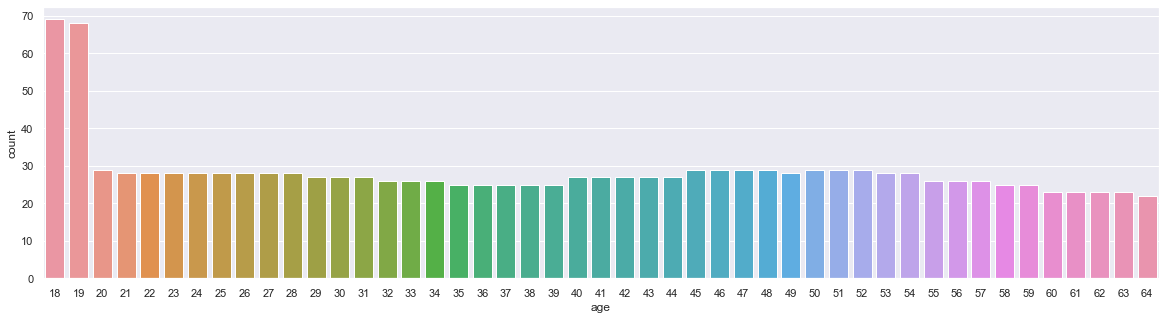

In [5]:
fig = plt.figure(figsize=(20,5))
sns.countplot(x = 'age', data=df)

<AxesSubplot:xlabel='region', ylabel='count'>

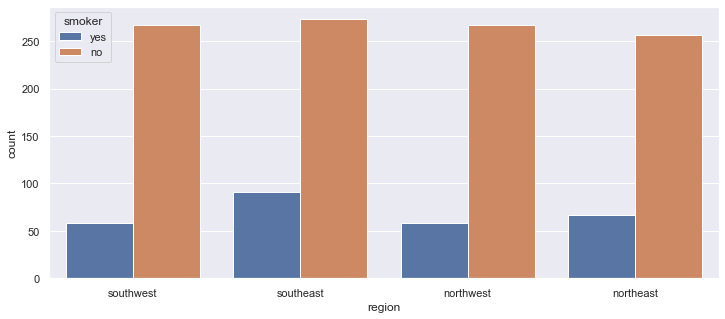

In [6]:
fig = plt.figure(figsize=(12,5))
sns.countplot(x="region", hue="smoker", data=df)

<AxesSubplot:xlabel='sex', ylabel='count'>

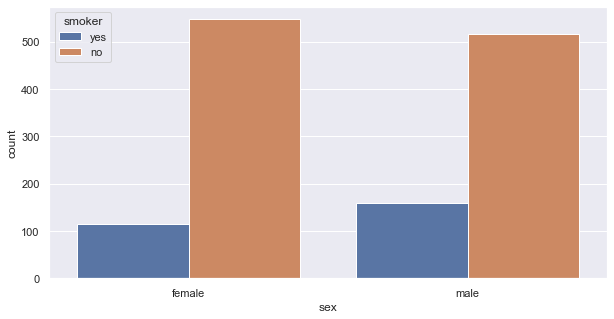

In [7]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x="sex", hue="smoker", data=df)

# Label Encoder

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le = LabelEncoder()

In [10]:
df.smoker = le.fit_transform(df['smoker'])

In [11]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


# Label Encoder using Loop

In [12]:
import pandas as pd
df = pd.read_csv('insurance.csv')

In [13]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [14]:
from pandas.core.dtypes.common import is_numeric_dtype

In [15]:
for column in df.columns:
    if is_numeric_dtype(df[column]):
        continue
    else:
        df[column] = le.fit_transform(df[column])

In [16]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [17]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns; sns.set_theme()
import sklearn 
from sklearn import tree

In [18]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [19]:
df.smoker.unique()

array(['yes', 'no'], dtype=object)

<AxesSubplot:xlabel='smoker', ylabel='count'>

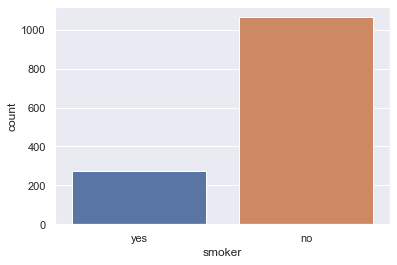

In [20]:
sns.countplot(x = 'smoker', data=df)

In [21]:
df['sex'] = le.fit_transform(df['sex'])
df['region'] = le.fit_transform(df['region'])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,3,16884.92400
1,18,1,33.770,1,no,2,1725.55230
2,28,1,33.000,3,no,2,4449.46200
3,33,1,22.705,0,no,1,21984.47061
4,32,1,28.880,0,no,1,3866.85520


In [22]:
x = df.drop('smoker', axis=1)
y = df['smoker']

In [23]:
x.head()

,age,sex,bmi,children,region,charges
0,19,0,27.900,0,3,16884.92400
1,18,1,33.770,1,2,1725.55230
2,28,1,33.000,3,2,4449.46200
3,33,1,22.705,0,1,21984.47061
4,32,1,28.880,0,1,3866.85520


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   int32  
 6   charges   1338 non-null   float64
dtypes: float64(2), int32(2), int64(2), object(1)
memory usage: 62.8+ KB


In [25]:
x.columns

Index(['age', 'sex', 'bmi', 'children', 'region', 'charges'], dtype='object')

In [26]:
y.index

RangeIndex(start=0, stop=1338, step=1)

In [27]:
y

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object

In [28]:
from sklearn.model_selection import train_test_split as tts

In [29]:
xtrain,xtest, ytrain, ytest = tts(x,y,test_size=.30,random_state=38)

In [30]:
xtrain.shape

(936, 6)

In [31]:
xtest.shape

(402, 6)

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
clf = DecisionTreeClassifier()

In [34]:
clf.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [35]:
y_pred = clf.predict(xtest)

# Confusion Matrix

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
pred = clf.predict(xtest)

In [38]:
pred # predicted result

array(['yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'yes', 'yes', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'yes', 'no', 'yes',
       'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no',
       'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no',
       'no', 'no', 'yes', 'yes', 'no', 'no', 'no', 'no', 'no', 'no',
       'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'yes', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'yes', 'no',
       'no', 'yes', 'no', 'yes', 'yes', 'no', 'no', 'no', 'no', 'no',
       'no', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes',
       'no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes',
       'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'y

In [39]:
np.array(ytest) # actual result

array(['yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'yes', 'yes', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'yes', 'no', 'yes',
       'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no',
       'no', 'no', 'no', 'no', 'yes', 'yes', 'no', 'no', 'no', 'yes',
       'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'no', 'no', 'no',
       'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no',
       'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'yes',
       'no', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'no', 'no', 'no',
       'no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'yes', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no', 'no',
       'yes', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'yes',

In [40]:
confusion_matrix(ytest, pred)

array([[315,  11],
       [ 11,  65]], dtype=int64)

In [41]:
tp, fn, fp, tn = confusion_matrix(ytest, pred).reshape(-1)

In [42]:
tp

315

In [43]:
fn

11

In [44]:
fp

11

In [45]:
tn

65

In [46]:
accuracy = (tp+tn) / (len(ytest))

In [47]:
accuracy

0.945273631840796

In [48]:
len(ytest)

402

In [49]:
clf.score(xtest, ytest)

0.945273631840796

In [50]:
cm = confusion_matrix(ytest, pred)

In [51]:
cm

array([[315,  11],
       [ 11,  65]], dtype=int64)

<AxesSubplot:>

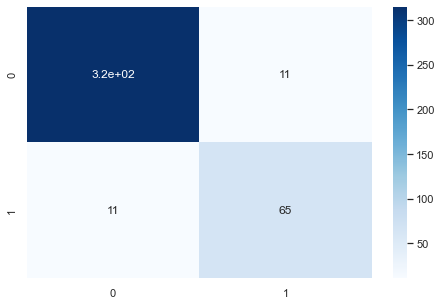

In [52]:
fig = plt.figure(figsize=(17,5))
ax = plt.subplot(121)
sns.heatmap(cm,annot=True, cmap = "Blues")

<AxesSubplot:>

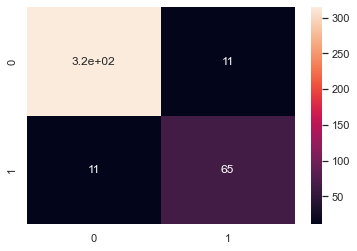

In [53]:
sns.heatmap(cm,annot=True)

Text(30.5, 0.5, 'Actual Values')

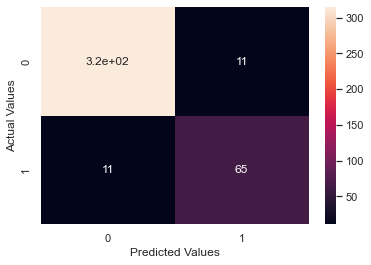

In [54]:
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

# Accuracy

In [55]:
from sklearn.metrics import accuracy_score

In [56]:
pred = clf.predict(xtest)

In [57]:
pred # predicted result

array(['yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'yes', 'yes', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'yes', 'no', 'yes',
       'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no',
       'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no',
       'no', 'no', 'yes', 'yes', 'no', 'no', 'no', 'no', 'no', 'no',
       'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'yes', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'yes', 'no',
       'no', 'yes', 'no', 'yes', 'yes', 'no', 'no', 'no', 'no', 'no',
       'no', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes',
       'no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes',
       'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'y

In [58]:
np.array(ytest) # actual result

array(['yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'yes', 'yes', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'yes', 'no', 'yes',
       'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no',
       'no', 'no', 'no', 'no', 'yes', 'yes', 'no', 'no', 'no', 'yes',
       'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'no', 'no', 'no',
       'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no',
       'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'yes',
       'no', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'no', 'no', 'no',
       'no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'yes', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no', 'no',
       'yes', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'yes',

In [59]:
accuracy_score(ytest, pred)

0.945273631840796

# PPV

In [60]:
precision= tp/(tp+fp)
precision

0.9662576687116564

In [61]:
from sklearn.metrics import precision_score
precision_score(ytest, pred, average=None)

array([0.96625767, 0.85526316])

# Recall

In [62]:
Recall= tp/(tp+fn)
Recall

0.9662576687116564

In [63]:
from sklearn.metrics import recall_score
recall_score(ytest, pred, average=None)

array([0.96625767, 0.85526316])

# FPR

In [64]:
FPR=fp/(fp+tn)
FPR

0.14473684210526316

# F1 Measure

In [65]:
F1_Measure= (precision+Recall)/2
F1_Measure

0.9662576687116564

# Harmonic Mean, F1

In [66]:
HM = (2 * precision * Recall)/(precision + Recall)
HM

0.9662576687116564

In [67]:
from sklearn.metrics import f1_score
f1_score(ytest, pred, average=None)

array([0.96625767, 0.85526316])

# TNR

In [68]:
TNR= tn/(tn+fp)
TNR

0.8552631578947368

# CSI

In [69]:
CSI = tp/(tp+fn+fp)
CSI

0.9347181008902077

# FDR

In [70]:
FDR= fp/(tp+fp)
FDR

0.03374233128834356

# BA

In [71]:
#BA = tpr + tnr / 2

In [ ]:
#from sklearn.metrics import balanced_accuracy_score
#balanced_accuracy_score(ytest, pred, average=None)

In [72]:
from sklearn.metrics import classification_report, plot_roc_curve, accuracy_score

In [73]:
classification_report(ytest, pred)

'              precision    recall  f1-score   support\n\n          no       0.97      0.97      0.97       326\n         yes       0.86      0.86      0.86        76\n\n    accuracy                           0.95       402\n   macro avg       0.91      0.91      0.91       402\nweighted avg       0.95      0.95      0.95       402\n'

In [74]:
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

          no       0.97      0.97      0.97       326
         yes       0.86      0.86      0.86        76

    accuracy                           0.95       402
   macro avg       0.91      0.91      0.91       402
weighted avg       0.95      0.95      0.95       402



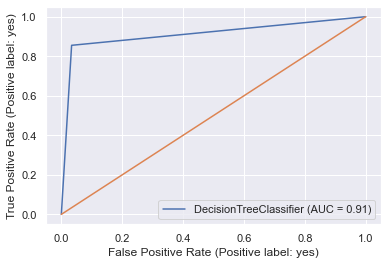

In [75]:
plot_roc_curve(clf,xtest, ytest)
plt.plot([0,1],[0,1])